In [ ]:
import numpy as np
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt

#import pemodelan 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
#from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

#menonaktifkan warnings
import warnings
warnings.filterwarnings("ignore")

#import datetime
from datetime import datetime


In [ ]:
dpc = pd.read_csv('/content/IndonesianCoffee.csv')

In [ ]:
dpc.head()

,Date,Month of Product coffee
0,2016-01,959
1,2016-02,515
2,2016-03,804
3,2016-04,41100
4,2016-05,37169


In [ ]:
dpc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date                     60 non-null     object
 1   Month of Product coffee  60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
dpc.describe()

,Month of Product coffee
count,60.000000
mean,59146.683333
std,59510.586133
min,513.000000
25%,6302.500000
50%,41264.000000
75%,105110.500000
max,219403.000000


In [ ]:
dpc['Month of Product coffee'].unique()

array([   959,    515,    804,  41100,  37169,  69243, 109036, 134137,
       109534, 102997,  45744,  12631,    956,    513,    749,  41428,
        37430,  69644, 109396, 134330, 110001, 103802,  46087,  12658,
          645,   2807,   1020,  16764,  67109, 138783, 167235, 137401,
        78715,  60797,  36258,   6366,    669,   2945,   1057,  17149,
        69298, 144229, 173855, 142982,  81920,  63676,  37567,   6311,
         6972,   6044,   7496,   4963,   6277,  49934, 166560, 191674,
       219403,  81203,  12884,   8970])

In [ ]:
dpc['Date'] = pd.to_datetime(dpc['Date']) 
dpc.dtypes

Date                       datetime64[ns]
Month of Product coffee             int64
dtype: object

In [ ]:
#konversi bulan 
indexDate = dpc.set_index('Date')
indexDate.head()

,Month of Product coffee
Date,
2016-01-01,959
2016-02-01,515
2016-03-01,804
2016-04-01,41100
2016-05-01,37169


#Time series forecasting


In [ ]:
import plotly.express as px
fig = px.line(dpc, x='Date', y="Month of Product coffee")
fig.show()

4 Month average


Text(0.5, 1.0, '4 Months Moving Average')

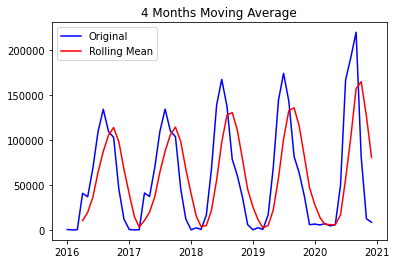

In [ ]:
four_months_moving_average = indexDate.rolling(window=4).mean()
plt.plot(indexDate, color='blue', label='Original')
plt.plot(four_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('4 Months Moving Average')

6 Month average


Text(0.5, 1.0, '6 Months Moving Average')

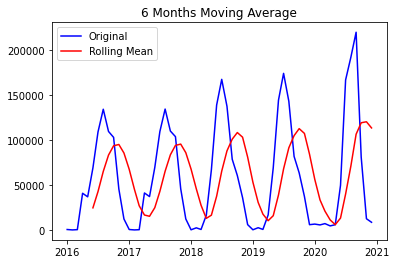

In [ ]:
six_months_moving_average = indexDate.rolling(window=6).mean()
plt.plot(indexDate, color='blue', label='Original')
plt.plot(six_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('6 Months Moving Average')

8 Month average


Text(0.5, 1.0, '8 Months Moving Average')

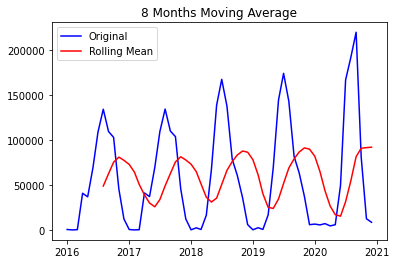

In [ ]:
eight_months_moving_average = indexDate.rolling(window=8).mean()
plt.plot(indexDate, color='blue', label='Original')
plt.plot(eight_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('8 Months Moving Average')

12 Month average

Text(0.5, 1.0, '12 Months Moving Average')

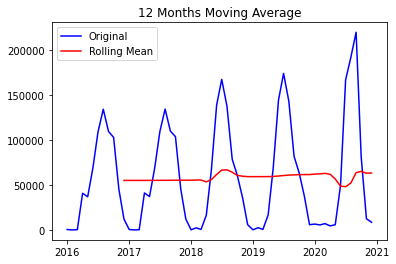

In [ ]:
twelve_months_moving_average = indexDate.rolling(window=12).mean()
plt.plot(indexDate, color='blue', label='Original')
plt.plot(twelve_months_moving_average, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('12 Months Moving Average')

ARIMA seasonal


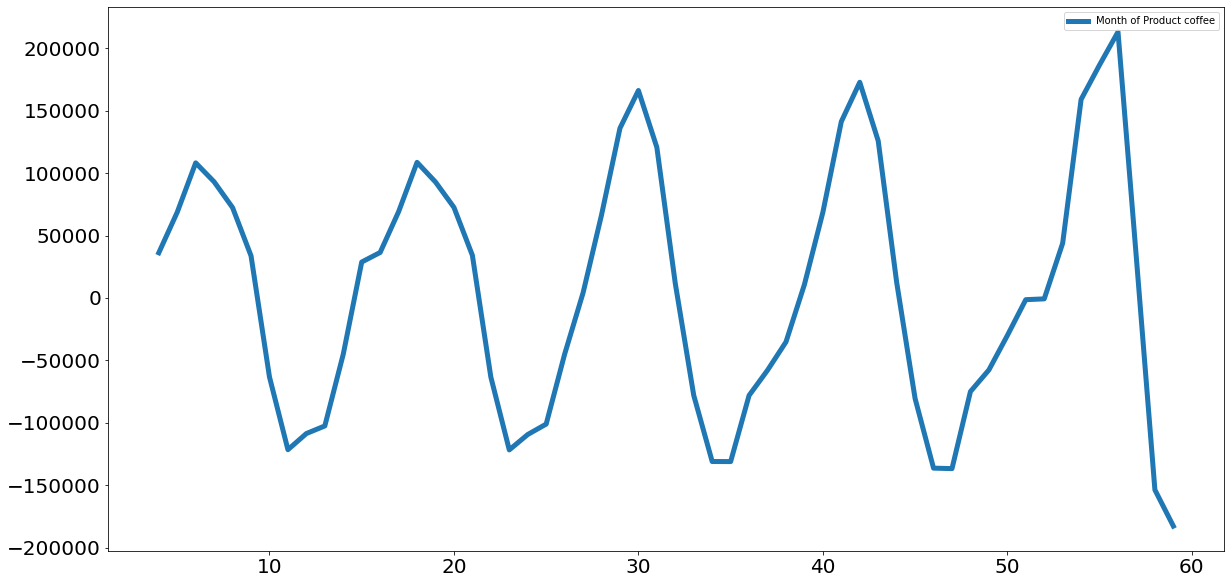

In [ ]:
rider = dpc[['Month of Product coffee']]
rider.diff(periods=4).plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()